![](../../../../Documents/Screenshots/screenshot.286.jpg)
![](../../../../Documents/Screenshots/screenshot.284.jpg)


In [116]:
import numpy as np
import pandas as pd
from tensorflow.python.ops.init_ops_v2 import glorot_uniform
from keras.layers import ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras import Sequential
import tensorflow as tf

shape = (96, 96, 1)


def convolutional_block(filters):
    f1, f2, f3 = filters

    return [
        Conv2D(f1, (1, 1), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0)),
        MaxPooling2D((2, 2)),
        BatchNormalization(axis=3),
        Activation('relu'),

        Conv2D(f2, (3, 3), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0)),
        BatchNormalization(axis=3),
        Activation('relu'),

        Conv2D(f3, (3, 3), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0)),
        BatchNormalization(axis=3),

        Conv2D(f3, (1, 1), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0)),
        MaxPooling2D((2, 2)),
        BatchNormalization(axis=3),

        Activation('relu')
    ]


def identity_block(filters):
    f1, f2, f3 = filters

    return [
        Conv2D(f1, (1, 1), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0)),
        BatchNormalization(axis=3),
        Activation('relu'),

        Conv2D(f2, (3, 3), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0)),
        BatchNormalization(axis=3),
        Activation('relu'),

        Conv2D(f3, (1, 1), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0)),
        BatchNormalization(axis=3),
        Activation('relu')
    ]


def res_block(model, filters):
    layers = []

    layers.extend(convolutional_block(filters))
    layers.extend(identity_block(filters))
    layers.extend(identity_block(filters))

    for layer in layers:
        model.add(layer)


def resnet():
    model = Sequential()
    model.add(ZeroPadding2D((3, 3), input_shape=shape))
    model.add(Conv2D(64, (3, 3), name='conv1'))
    model.add(BatchNormalization(axis=3, name='bn_conv1'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((3, 3)))

    res_block(model, [64, 64, 256])
    res_block(model, [128, 128, 512])

    model.add(AveragePooling2D((2, 2), name='avg_pool'))
    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2048, activation='relu'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(30, activation='relu'))

    return model

In [3]:
model = resnet()
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 102, 102, 1)      0         
 2D)                                                             
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 64)      640       
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 100, 100, 64)     256       
 n)                                                              
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 64)       0         
 )                                                               
                                                        

In [188]:
data = pd.read_feather('datasets/augmented_data.feather').copy()
data

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.726353,39.959788,30.132000,39.328871,60.416471,39.328871,73.385647,41.013529,37.703294,38.066965,...,56.994847,62.625176,76.553647,32.971059,76.869176,48.113647,70.244471,47.798118,84.440471,0.00543 0.00541 0.0055 0.00543 0.00513 0.00474...
1,26.122504,41.444354,46.891566,65.433057,30.441075,45.408925,22.368487,37.053585,42.594146,61.025747,...,34.464890,57.968523,13.661815,73.980893,32.461575,61.575801,26.004255,65.321649,23.011287,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
2,67.644923,35.806769,30.516923,33.056615,61.594462,36.081846,72.595077,37.182154,35.742769,34.706462,...,57.154462,58.294154,74.859692,33.817231,72.659692,45.643077,68.534154,44.818462,81.735385,0.00281 0.002735 0.003036 0.004025 0.003492 0....
3,59.060656,28.068398,61.703977,67.311469,58.653998,36.811678,57.637308,20.341536,60.077300,58.974938,...,50.231659,16.767697,34.168265,18.190863,66.904720,21.443943,51.858199,8.024417,52.671697,0.4038 0.3647 0.306 0.298 0.3137 0.3293 0.3843...
4,34.659778,35.784862,68.369724,36.415190,39.904107,36.843813,22.759184,37.045518,59.444278,37.726272,...,59.821648,39.275433,76.962439,48.939912,76.649961,46.306174,79.216740,46.417773,80.020253,0.0745 0.0706 0.06665 0.06274 0.0745 0.08234 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30019,68.125277,35.978860,31.155064,36.891677,62.648170,35.978860,74.515404,36.891677,37.088681,38.260902,...,55.971677,65.842723,72.948766,37.088681,75.230298,50.325447,70.209702,50.780936,82.989957,0.05286 0.0538 0.0567 0.0567 0.048 0.03674 0.0...
30020,64.794504,39.382351,30.064489,38.714382,57.781740,41.052092,73.143206,40.384122,37.411053,40.384122,...,63.092519,64.126901,81.459298,31.066260,82.127267,47.763298,75.114504,48.097466,89.140031,0.149 0.1333 0.1255 0.1216 0.1137 0.102 0.098 ...
30021,66.793486,57.273753,43.908208,25.890490,61.589613,52.442580,70.045194,62.975725,46.935294,31.780944,...,55.306622,26.049628,79.964947,11.627461,61.407733,23.223736,67.006301,11.979579,76.441269,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
30022,63.764706,37.941929,28.012235,37.941929,59.558588,38.783153,71.811765,37.510588,34.321882,38.362541,...,52.243012,63.764706,72.012235,34.321882,73.694118,50.725647,69.488000,51.146353,81.265882,0.004425 0.004055 0.003712 0.003317 0.003078 0...


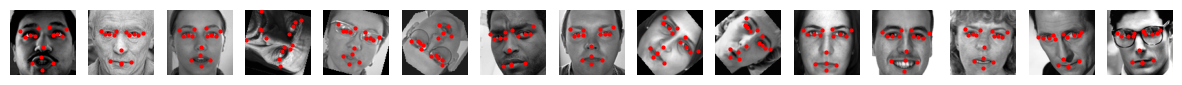

In [193]:
from matplotlib import pyplot as plt

images = pd.DataFrame(data.loc[:,'Image'])
points = data.iloc[:, :-1]

def visualize_images_with_points(n_images: int, dataset, shape, points):
    """Visualize n_images images from the dataset."""
    images = dataset.sample(n_images)
    points = points.loc[images.index]
    images = images.apply(
        lambda x: x.str.split(' ', expand=True).astype(np.float32).to_numpy().reshape(shape), axis=1
    ).values

    fig, axes = plt.subplots(1, n_images, figsize=(n_images, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.plot(points.values[i][0::2], points.values[i][1::2], 'ro', markersize=2)

        ax.axis('off')

    plt.show()

visualize_images_with_points(15, images, (96, 96), points)

In [53]:
from sklearn.model_selection import train_test_split

data_in_batches = np.array_split(data, 50)

for batch in data_in_batches:
    images = batch['Image'].str.split(' ', expand=True).astype(np.float32).to_numpy().reshape(-1, 96, 96, 1)
    points = batch.iloc[:, :-1].to_numpy()

    train_x, test_x, train_y, test_y = train_test_split(images, points, train_size=0.8)
    model.fit(train_x, train_y, epochs=100, validation_data=(test_x, test_y))

Epoch 1/100
7/7 [==============================] - 6s 440ms/step - loss: 213.7953 - accuracy: 0.3073 - val_loss: 1584.3108 - val_accuracy: 0.4615
Epoch 2/100
7/7 [==============================] - 3s 370ms/step - loss: 208.9480 - accuracy: 0.3171 - val_loss: 1483.1013 - val_accuracy: 0.4615
Epoch 3/100
7/7 [==============================] - 3s 382ms/step - loss: 208.3684 - accuracy: 0.3220 - val_loss: 1400.5427 - val_accuracy: 0.4615
Epoch 4/100
7/7 [==============================] - 3s 365ms/step - loss: 203.0669 - accuracy: 0.3024 - val_loss: 1285.6090 - val_accuracy: 0.4615
Epoch 5/100
7/7 [==============================] - 3s 367ms/step - loss: 169.7825 - accuracy: 0.3122 - val_loss: 1197.1174 - val_accuracy: 0.4615
Epoch 6/100
7/7 [==============================] - 3s 387ms/step - loss: 126.3024 - accuracy: 0.3220 - val_loss: 1071.7655 - val_accuracy: 0.4615
Epoch 7/100
7/7 [==============================] - 2s 348ms/step - loss: 136.5556 - accuracy: 0.2634 - val_loss: 1075.4015 -

KeyboardInterrupt: 